# Playing with Parametrized Gates - Case #1

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from IPython.display import clear_output

## Objective: 

**To implement a circuit that returns |01⟩ and |10⟩ with equal probabilities, using only CNOTs, RXs and RYs.**

Producing the usual Bell-state $|\psi_+\rangle = \frac{1}{\sqrt{2}} \lgroup |01\rangle + |10\rangle \rgroup$

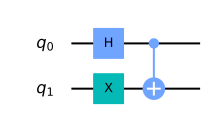

In [2]:
from qiskit import QuantumCircuit

std_cirq=QuantumCircuit(2)
std_cirq.h(0)  # Hadamard gate on q0
std_cirq.x(1)  # X gate on q1
std_cirq.cx(0,1)  # CNOT on q1 controlled on q0
std_cirq.draw('mpl')

Visualizing:

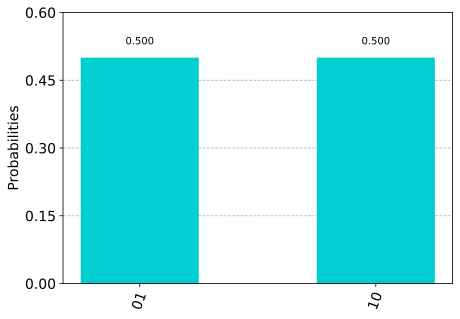

In [3]:
from qiskit import Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('statevector_simulator')
#state = execute(std_cirq,backend).result().get_statevector()
results = execute(std_cirq,backend).result().get_counts()
plot_histogram(results, color='darkturquoise')

Trying to pull up a circuit with Rx, Ry and CNOT gates to achieve the required states

<img src='circuit.jpeg' />


**Calculating the angle values for `Rx` and `Ry` gates in the above circuit:**    

We know that:    
We have to generate equal probabilities of $|01\rangle$ and $|10\rangle$ in state $|\psi\rangle = \alpha\lvert01\rangle + \beta\lvert10\rangle$
i.e.,

$$
\left\lVert\alpha^2\right\rVert = \left\lVert\beta^2\right\rVert = 0.5
$$
and hence, $\alpha = \beta = \frac{1}{\sqrt{2}}$

That means:

$$
\begin{aligned}
    |\psi\rangle &= \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle \\
    &= \begin{bmatrix} 
        0 \\ 
        \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}} \\
        0 \\
    \end{bmatrix}\\
\end{aligned}    
$$

**As we see in the diagram:**

$$
\begin{aligned}
    |\psi_2\rangle &= CNOT |\psi\rangle \\
    &= \begin{bmatrix} 
        1 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0 \\
        0 & 1 & 0 & 0 \\
    \end{bmatrix} \cdot
    \begin{bmatrix} 
        0 \\ 
        \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}} \\
        0 \\
    \end{bmatrix}\\
    &= \begin{bmatrix} 
        0 \\ 
        0 \\
        \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}} \\
    \end{bmatrix}\\
    \\
    &= \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|11\rangle \\
    \\
    &= \lgroup\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\rgroup \otimes |1\rangle \\
\end{aligned}
$$

The sets both the qubits in a completely separable state, so we can work on them individually.

$$
\begin{aligned}
    |q_0\rangle &= \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle \\
    &= \begin{bmatrix} 
        \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}} \\
    \end{bmatrix}\\
    \\
    |q_1\rangle &= |1\rangle \\
\end{aligned}
$$

**The unitary matrices for $RY(\theta_1)$ and $RX(\theta_2)$ gates are given by:**

$$
\begin{aligned}
    RY(\theta_1) & = 
    \begin{bmatrix} 
        cos(\frac{\theta_1}{2}) & -sin(\frac{\theta_1}{2}) \\ 
        sin(\frac{\theta_1}{2}) & cos(\frac{\theta_1}{2})
    \end{bmatrix}\\
    RX(\theta_2) & = 
    \begin{bmatrix} 
        cos(\frac{\theta_2}{2}) & -isin(\frac{\theta_2}{2}) \\ 
        -isin(\frac{\theta_2}{2}) & cos(\frac{\theta_2}{2})
    \end{bmatrix}\\
\end{aligned}
$$

**Applying the gates on $q_0$:**

$$
\begin{aligned}
    |q_0\rangle &=
    \begin{bmatrix}
        \cos\frac{\theta_2}{2} & -i\sin\frac{\theta_2}{2} \\
        -i\sin\frac{\theta_2}{2} & \cos\frac{\theta_2}{2} 
    \end{bmatrix}\cdot
    \begin{bmatrix}
        \cos\frac{\theta_1}{2} & -\sin\frac{\theta_1}{2} \\
        \sin\frac{\theta_1}{2} & \cos\frac{\theta_1}{2} 
    \end{bmatrix}\cdot
    \begin{bmatrix}
        1 \\
        0  
    \end{bmatrix} \\
    &= \begin{bmatrix}
        \cos\frac{\theta_2}{2} & -i\sin\frac{\theta_2}{2} \\
        -i\sin\frac{\theta_2}{2} & \cos\frac{\theta_2}{2} 
    \end{bmatrix}\cdot
    \begin{bmatrix}
        \cos\frac{\theta_1}{2} \\
        \sin\frac{\theta_1}{2}  
    \end{bmatrix} \\
    &= \begin{bmatrix}
        \cos\frac{\theta_2}{2}\cos\frac{\theta_1}{2} - i\sin\frac{\theta_2}{2}\sin\frac{\theta_1}{2}  \\
        \cos\frac{\theta_2}{2}\sin\frac{\theta_1}{2} - i\sin\frac{\theta_2}{2}\cos\frac{\theta_1}{2} 
    \end{bmatrix} \\
\end{aligned}
$$

**Equating with values of $|q_0\rangle$**
$$
\begin{aligned}
    \begin{bmatrix}
        \cos\frac{\theta_2}{2}\cos\frac{\theta_1}{2} - i\sin\frac{\theta_2}{2}\sin\frac{\theta_1}{2}  \\
        \cos\frac{\theta_2}{2}\sin\frac{\theta_1}{2} - i\sin\frac{\theta_2}{2}\cos\frac{\theta_1}{2} 
    \end{bmatrix}
    &= \begin{bmatrix}
        \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}}  
    \end{bmatrix} \\
\end{aligned}
$$

We get:

$$
\begin{aligned}
    \cos\frac{\theta_2}{2}\cos\frac{\theta_1}{2} &= \frac{1}{\sqrt{2}}, \\
    \cos\frac{\theta_2}{2}\sin\frac{\theta_1}{2} &= \frac{1}{\sqrt{2}},
\end{aligned}
$$
and
$$
\begin{aligned}
    \sin\frac{\theta_2}{2}\sin\frac{\theta_1}{2} &= 0 \\
    \sin\frac{\theta_2}{2}\cos\frac{\theta_1}{2} &= 0
\end{aligned}
$$
Solving the above, we get: $\theta_1 = \frac{\pi}{2}$; $\theta_2 = \pi$

**Applying the $Rx(\theta_3)$ gate to get an effect of X gate on $q_1$:**

i.e., $Rx(\theta_3) * |0\rangle = |1\rangle$

$$
\begin{aligned}
    \begin{bmatrix} 
        \cos(\frac{\theta_3}{2}) & -i\sin(\frac{\theta_3}{2}) \\ 
        -i\sin(\frac{\theta_3}{2}) & \cos(\frac{\theta_3}{2}) 
    \end{bmatrix} \cdot
    \begin{bmatrix}
        1 \\
        0  
    \end{bmatrix}
    & = \begin{bmatrix}
        0 \\
        1  
    \end{bmatrix} \\
    \begin{bmatrix} 
        \cos(\frac{\theta_3}{2}) \\ 
        -i\sin(\frac{\theta_3}{2}) 
    \end{bmatrix}
    & = \begin{bmatrix}
        0 \\
        1  
    \end{bmatrix}
\end{aligned}
$$

Apply a global phase `i` on RHS, and we get:

$$
\begin{aligned}    
    \begin{bmatrix} 
        \cos(\frac{\theta_3}{2}) \\ 
        -i\sin(\frac{\theta_3}{2}) 
    \end{bmatrix}
    & = \begin{bmatrix}
        0 \\
        i  
    \end{bmatrix}
\end{aligned}
$$

Solving the above, we get: $\theta_3 = \pi$

Now that we have the angle values for $\theta_1$, $\theta_2$ and $\theta_3$, building the circuit:

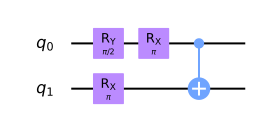

In [4]:
from numpy import pi

cirq = QuantumCircuit(2)
cirq.ry(pi/2, 0) 
cirq.rx(pi, 0)
cirq.rx(pi, 1)
cirq.cx(0,1)

cirq.draw('mpl')

Visualizing:

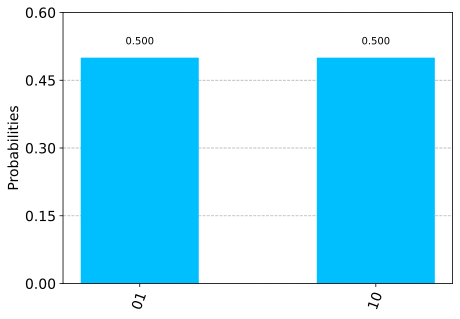

In [5]:
results = execute(cirq,backend).result().get_counts()
plot_histogram(results, color='deepskyblue')

Plotting on the Q-sphere:

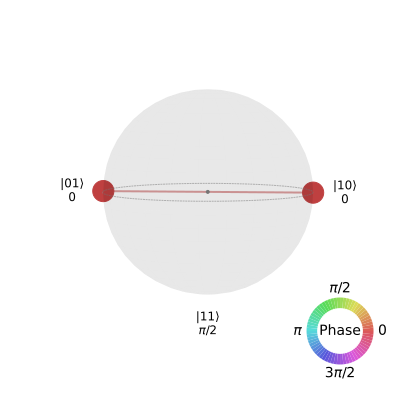

In [9]:
from qiskit.visualization import plot_state_qsphere

sv = Statevector.from_label('00').evolve(cirq)
plot_state_qsphere(sv.data, show_state_phases=True)

In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.21.0'}

# Thank you.

--Pragya Katyayan.